# Interpolasi Chevbyshev

Interpolasi Chebyshev melibatkan penggunaan **Chebyshev nodes** dan polynomial untuk membangun interpolasi polynomial. Interpolasi ini dapat meminimalkan Runge's phenomenon.

## Chebyshev nodes
Idenya adalah mendistribusikan error secara seragam. Chebyshev nodes dapat dipilih di dalam interval $[a,b]$ dengan

$$\bar{x}_i = \frac{1}{2} (a + b) + \frac{1}{2} (b - a) \cos \left( \frac{2i + 1}{2n + 2} \pi \right), \hspace{1em} i=0,1, \cdots, n$$



## Polynomial Chebyshev

:::{admonition} **Definisi: Polynomial Chebyshev**
:name: poly_chebyshev
:class: note

Jenis pertama dari polynomial Chebyshev didapatkan dari relasi reccurence sebagai berikut

$$ 
\begin{align*}
T_0(x) &= 1 \\
T_1(x) &= x \\
T_{n}(x) &= 2xT_{n-1}(x) - T_{n-2}(x).
\end{align*}
$$

:::

In [1]:
using Polynomials
using Plots

In [2]:
function chebyshev_nodes(n, a, b)
    return [(a + b) / 2 + (b - a) / 2 * cos(k/n * π) for k in 1:n]
end

chebyshev_nodes (generic function with 1 method)

In [3]:
function poly_chebyshev(n, x)
    if n == 0
        return 1
    elseif n == 1
        return x
    else
        return 2 * x * poly_chebyshev(n - 1, x) - poly_chebyshev(n - 2, x)
    end
end

poly_chebyshev (generic function with 1 method)

In [4]:
N = 30
x = [2*i/N - 1 for i=1:N]
y = 1 ./(1 .+ 25 .* x .^ 2);

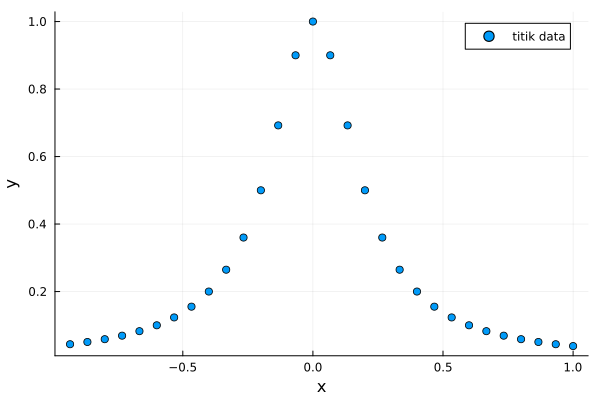

In [5]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)

In [6]:
# batas bawah dan batas atas
a, b = x[1], x[N]

(-0.9333333333333333, 1.0)

In [7]:
nodes = chebyshev_nodes(N, a, b)
p = Polynomials.fit(nodes, y)

Polynomial(0.9879930921166761 + 0.7076472819735251*x - 10.051247628349513*x^2 - 14.356954070992323*x^3 + 89.88747979802058*x^4 + 206.29004104559112*x^5 - 661.1281835477716*x^6 - 2269.258480613842*x^7 + 3512.479715963994*x^8 + 18553.214672138223*x^9 - 11384.13120183337*x^10 - 110573.77183625322*x^11 + 10570.190172282135*x^12 + 479421.5127722864*x^13 + 86766.94682721066*x^14 - 1.5188729535784062e6*x^15 - 478147.66625319666*x^16 + 3.52635412352407e6*x^17 + 1.27529332067997e6*x^18 - 5.981537079937485e6*x^19 - 2.117791635885789e6*x^20 + 7.320183471436624e6*x^21 + 2.283391866460411e6*x^22 - 6.289134630140494e6*x^23 - 1.5601553382426086e6*x^24 + 3.597722330655648e6*x^25 + 615521.6295351338*x^26 - 1.2302663019248298e6*x^27 - 107001.12163029748*x^28 + 190230.5122996648*x^29)

## Pengujian

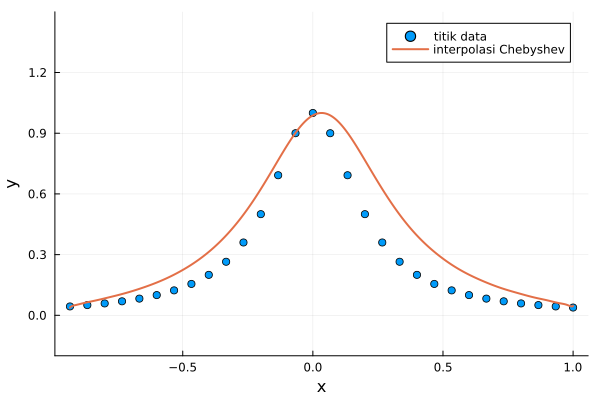

In [8]:
xx = range(a, b, length=1000)
yy = p.(xx)

scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)
plot!(xx, yy, label="interpolasi Chebyshev", linewidth=2, ylimits=(-0.2,1.5))

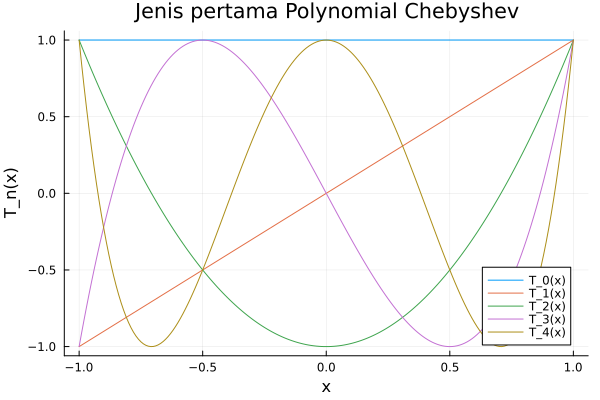

In [10]:
x_vals = -1:0.01:1
plot(x_vals, poly_chebyshev.(0, x_vals), label="T_0(x)", xlabel="x", ylabel="T_n(x)", title="Jenis pertama Polynomial Chebyshev")
plot!(x_vals, poly_chebyshev.(1, x_vals), label="T_1(x)")
plot!(x_vals, poly_chebyshev.(2, x_vals), label="T_2(x)")
plot!(x_vals, poly_chebyshev.(3, x_vals), label="T_3(x)")
plot!(x_vals, poly_chebyshev.(4, x_vals), label="T_4(x)")